# **Final Project Task 1 -Census Data Preprocess**

Requirements

- Encode data
- Handle missing values if any
- Correct errors, inconsistencies, remove duplicates if any
- Outlier detection and treatment if any
- Normalization / Standardization if necesarry
- Feature engineering
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [3]:
import pandas as pd

In [4]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [5]:

# verificarea daca exista valori null in dataframe
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
categorical_columns = [
    "workclass", "education", "marital-status",
    "occupation", "relationship", "race",
    "sex", "native-country", "income"
]


# Function to analyze categorical columns
def analyze_categorical_columns(df, columns):
    print("Categorical Column Analysis:\n")

    for column in columns:
        print(f"=== {column.upper()} ===")
        value_counts = df[column].value_counts()
        percentages = df[column].value_counts(normalize=True) * 100

        print("Value Counts:")
        print(value_counts)

        print("\nPercentages:")
        print(percentages.round(2))

        print("\nTotal Unique Values:", len(value_counts))
        print("\n" + "-" * 50 + "\n")

In [7]:
analyze_categorical_columns(data, categorical_columns)

Categorical Column Analysis:

=== WORKCLASS ===
Value Counts:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Percentages:
workclass
Private             69.70
Self-emp-not-inc     7.80
Local-gov            6.43
?                    5.64
State-gov            3.99
Self-emp-inc         3.43
Federal-gov          2.95
Without-pay          0.04
Never-worked         0.02
Name: proportion, dtype: float64

Total Unique Values: 9

--------------------------------------------------

=== EDUCATION ===
Value Counts:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th            

In [8]:
data[data['workclass'] == '?']

age workclass  fnlwgt     education  education-num  \
27      54         ?  180211  Some-college             10   
61      32         ?  293936       7th-8th              4   
69      25         ?  200681  Some-college             10   
77      67         ?  212759          10th              6   
106     17         ?  304873          10th              6   
...    ...       ...     ...           ...            ...   
32530   35         ?  320084     Bachelors             13   
32531   30         ?   33811     Bachelors             13   
32539   71         ?  287372     Doctorate             16   
32541   41         ?  202822       HS-grad              9   
32542   72         ?  129912       HS-grad              9   

              marital-status occupation   relationship                race  \
27        Married-civ-spouse          ?        Husband  Asian-Pac-Islander   
61     Married-spouse-absent          ?  Not-in-family               White   
69             Never-married          ?      Own-child               White   
77        Married-civ-spouse          ?        Husband               White   
106            Never-married          ?      Own-child               White   
...                      ...        ...            ...                 ...   
32530     Married-civ-spouse          ?           Wife               White   
32531          Never-married          ?  Not-in-family  Asian-Pac-Islander   
32539     Married-civ-spouse          ?        Husband               White   
32541              Separated          ?  Not-in-family               Black   
32542     Married-civ-spouse          ?        Husband               White   

          sex  capital-gain  capital-loss  hours-per-week native-country  \
27       Male             0             0              60          South   
61       Male             0             0              40              ?   
69       Male             0             0              40  United-States   
77       Male             0             0               2  United-States   
106    Female         34095             0              32  United-States   
...       ...           ...           ...             ...            ...   
32530  Female             0             0              55  United-States   
32531  Female             0             0              99  United-States   
32539    Male             0             0              10  United-States   
32541  Female             0             0              32  United-States   
32542    Male             0             0              25  United-States   

      income  
27      >50K  
61     <=50K  
69     <=50K  
77     <=50K  
106    <=50K  
...      ...  
32530   >50K  
32531  <=50K  
32539   >50K  
32541  <=50K  
32542  <=50K  

[1836 rows x 15 columns]

In [9]:
data[data['workclass'] == '?'][['workclass', 'occupation']]

workclass occupation
27            ?          ?
61            ?          ?
69            ?          ?
77            ?          ?
106           ?          ?
...         ...        ...
32530         ?          ?
32531         ?          ?
32539         ?          ?
32541         ?          ?
32542         ?          ?

[1836 rows x 2 columns]

In [10]:
# Count occurrences of '?' in each column
def count_question_mark_values(df):
    question_mark_counts = {}
    
    for column in df.columns:
        # Count rows where the value is exactly '?'
        count = (df[column] == '?').sum()
        
        if count > 0:
            question_mark_counts[column] = count
    
    return question_mark_counts

# Execute the function
question_mark_summary = count_question_mark_values(data)

# Print results
print("Columns with '?' values:")
for column, count in question_mark_summary.items():
    print(f"{column}: {count} occurrences")

Columns with '?' values:
workclass: 1836 occurrences
occupation: 1843 occurrences
native-country: 583 occurrences


In [11]:
# Remove rows with '?' in specified columns
columns_with_question_marks = ['workclass', 'occupation', 'native-country']

# Create a mask to remove rows with '?' in any of these columns
mask = ~data[columns_with_question_marks].isin(['?']).any(axis=1)

# Apply the mask to filter the dataframe
data_cleaned = data[mask]

# Verify removal
print("Before cleaning:")
for col in columns_with_question_marks:
    print(f"{col}: {(data[col] == '?').sum()} '?' values")

print("\nAfter cleaning:")
for col in columns_with_question_marks:
    print(f"{col}: {(data_cleaned[col] == '?').sum()} '?' values")

print(f"\nTotal rows removed: {len(data) - len(data_cleaned)}")


Before cleaning:
workclass: 1836 '?' values
occupation: 1843 '?' values
native-country: 583 '?' values

After cleaning:
workclass: 0 '?' values
occupation: 0 '?' values
native-country: 0 '?' values

Total rows removed: 2399


In [12]:
len(data)

32561

In [13]:
len(data_cleaned)

30162

In [14]:
data_cleaned

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[30162 rows x 15 columns]

In [15]:
data_cleaned[data_cleaned.duplicated()]

age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44           Private  367749     Bachelors             13   
22494   49  Self-emp-not-inc   43479  Some-college             10   
25872   23           Private  240137       5th-6th              3   
26313   28           Private  274679       Masters             14   
28230   27           Private  255582       HS-grad              9   
28522   42           Private  204235  Some-college             10   
28846   39           Private   30916       HS-grad              9   
29157   38           Private  207202       HS-grad              9   
30845   46           Private  133616  Some-college             10   
31993   19           Private  251579  Some-college             10   
32404   35           Private  379959       HS-grad              9   

           marital-status         occupation   relationship  \
4881        Never-married       Craft-repair  Not-in-family   
5104        Never-married      Other-service  Not-in-family   
9171        Never-married     Prof-specialty      Own-child   
11631       Never-married       Tech-support  Not-in-family   
13084       Never-married    Priv-house-serv  Not-in-family   
15059       Never-married    Farming-fishing  Not-in-family   
17040  Married-civ-spouse       Craft-repair        Husband   
18698       Never-married    Farming-fishing  Not-in-family   
21318       Never-married       Adm-clerical      Own-child   
21490       Never-married    Exec-managerial      Own-child   
21875  Married-civ-spouse       Craft-repair        Husband   
22300       Never-married    Priv-house-serv  Not-in-family   
22367       Never-married     Prof-specialty  Not-in-family   
22494  Married-civ-spouse       Craft-repair        Husband   
25872       Never-married  Handlers-cleaners  Not-in-family   
26313       Never-married     Prof-specialty  Not-in-family   
28230       Never-married  Machine-op-inspct  Not-in-family   
28522  Married-civ-spouse     Prof-specialty        Husband   
28846  Married-civ-spouse       Craft-repair        Husband   
29157  Married-civ-spouse  Machine-op-inspct        Husband   
30845            Divorced       Adm-clerical      Unmarried   
31993       Never-married      Other-service      Own-child   
32404            Divorced      Other-service  Not-in-family   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
4881                White    Male             0             0              40   
5104   Asian-Pac-Islander    Male             0             0              35   
9171                White  Female             0             0              10   
11631               White  Female             0             0              10   
13084               White  Female             0             0              40   
15059               White    Male             0             0              50   
17040               White    Male             0             0              40   
18698               White    Male             0             0              40   
21318               White  Female             0             0              10   
21490               Black  

In [16]:
data_cleaned[
    (data_cleaned['age'] == 25) & 
    (data_cleaned['workclass'] == 'Private') &
    (data_cleaned['fnlwgt'] == 308144)]

age workclass  fnlwgt  education  education-num marital-status  \
4325   25   Private  308144  Bachelors             13  Never-married   
4881   25   Private  308144  Bachelors             13  Never-married   

        occupation   relationship   race   sex  capital-gain  capital-loss  \
4325  Craft-repair  Not-in-family  White  Male             0             0   
4881  Craft-repair  Not-in-family  White  Male             0             0   

      hours-per-week native-country income  
4325              40         Mexico  <=50K  
4881              40         Mexico  <=50K

In [17]:
# Remove Duplicates
data_no_duplicates = data_cleaned.drop_duplicates()

In [18]:
data_no_duplicates[
    (data_no_duplicates['age'] == 25) & 
    (data_no_duplicates['workclass'] == 'Private') &
    (data_no_duplicates['fnlwgt'] == 308144)]

age workclass  fnlwgt  education  education-num marital-status  \
4325   25   Private  308144  Bachelors             13  Never-married   

        occupation   relationship   race   sex  capital-gain  capital-loss  \
4325  Craft-repair  Not-in-family  White  Male             0             0   

      hours-per-week native-country income  
4325              40         Mexico  <=50K

In [19]:
def detect_outliers_iqr(df, columns):
    outliers_dict = {}
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = {
            'count': len(outliers),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    
    return outliers_dict

# Numeric columns for outlier detection
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Detect outliers
outliers_summary = detect_outliers_iqr(data_no_duplicates, numeric_columns)

# Print outlier summary
for column, details in outliers_summary.items():
    print(f"{column}:")
    print(f"  Outliers: {details['count']}")
    print(f"  Lower Bound: {details['lower_bound']}")
    print(f"  Upper Bound: {details['upper_bound']}")


age:
  Outliers: 168
  Lower Bound: -0.5
  Upper Bound: 75.5
fnlwgt:
  Outliers: 904
  Lower Bound: -62338.0
  Upper Bound: 417570.0
education-num:
  Outliers: 193
  Lower Bound: 3.0
  Upper Bound: 19.0
capital-gain:
  Outliers: 2538
  Lower Bound: 0.0
  Upper Bound: 0.0
capital-loss:
  Outliers: 1427
  Lower Bound: 0.0
  Upper Bound: 0.0
hours-per-week:
  Outliers: 7947
  Lower Bound: 32.5
  Upper Bound: 52.5


In [20]:
data_no_duplicates['age'].describe()

count    30139.000000
mean        38.441720
std         13.131426
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

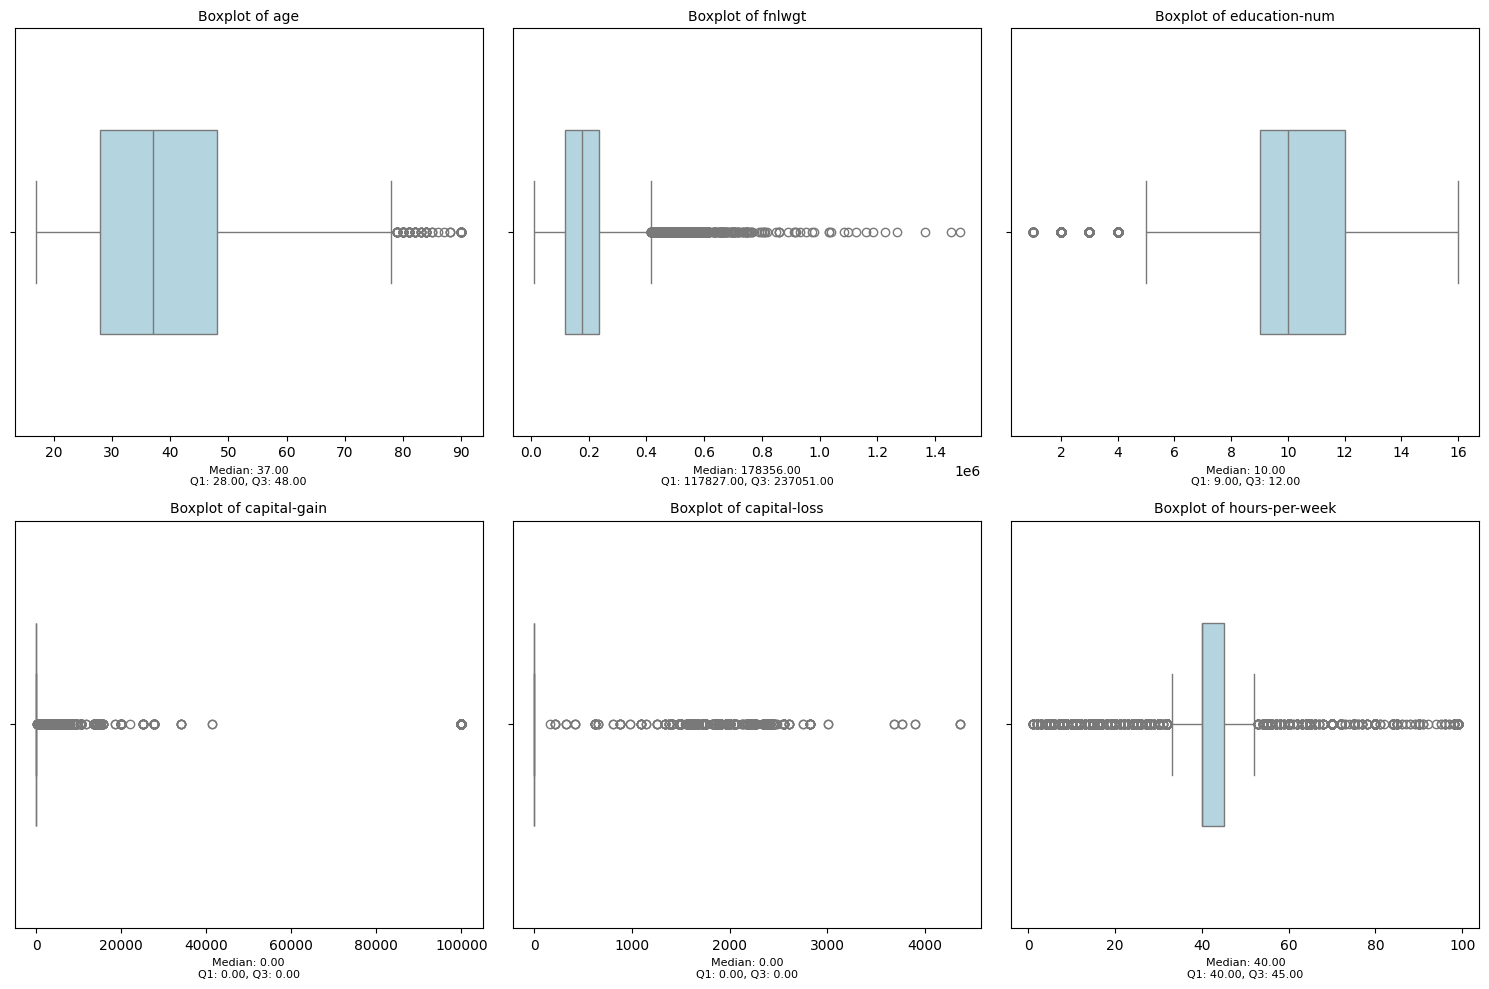

Detailed Outlier Analysis:

age:
  Total Rows: 32561
  Outliers Count: 143
  Outliers Percentage: 0.44%
  Lower Bound: -2.00
  Upper Bound: 78.00

fnlwgt:
  Total Rows: 32561
  Outliers Count: 992
  Outliers Percentage: 3.05%
  Lower Bound: -61009.00
  Upper Bound: 415887.00

education-num:
  Total Rows: 32561
  Outliers Count: 1198
  Outliers Percentage: 3.68%
  Lower Bound: 4.50
  Upper Bound: 16.50

capital-gain:
  Total Rows: 32561
  Outliers Count: 2712
  Outliers Percentage: 8.33%
  Lower Bound: 0.00
  Upper Bound: 0.00

capital-loss:
  Total Rows: 32561
  Outliers Count: 1519
  Outliers Percentage: 4.67%
  Lower Bound: 0.00
  Upper Bound: 0.00

hours-per-week:
  Total Rows: 32561
  Outliers Count: 9008
  Outliers Percentage: 27.66%
  Lower Bound: 32.50
  Upper Bound: 52.50


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns for boxplot
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Function to create boxplots with enhanced visualization
def create_comprehensive_boxplots(df, columns):
    # Set up the matplotlib figure
    plt.figure(figsize=(15, 10))
    
    # Create boxplots with statistical details
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        
        # Create boxplot
        sns.boxplot(x=df[column], 
                    color='lightblue', 
                    width=0.5, 
                    showfliers=True)
        
        # Add title and statistical information
        plt.title(f'Boxplot of {column}', fontsize=10)
        
        # Calculate and display statistical summary
        median = df[column].median()
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        
        plt.xlabel(f'Median: {median:.2f}\nQ1: {q1:.2f}, Q3: {q3:.2f}', fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Create boxplots
create_comprehensive_boxplots(data, numeric_columns)

# Detailed Outlier Analysis Function
def detailed_outlier_analysis(df, columns):
    outlier_summary = {}
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        outlier_summary[column] = {
            'total_rows': len(df),
            'outliers_count': len(outliers),
            'outliers_percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    
    return outlier_summary

# Perform detailed outlier analysis
outlier_analysis = detailed_outlier_analysis(data, numeric_columns)

# Print outlier analysis
print("Detailed Outlier Analysis:")
for column, details in outlier_analysis.items():
    print(f"\n{column}:")
    print(f"  Total Rows: {details['total_rows']}")
    print(f"  Outliers Count: {details['outliers_count']}")
    print(f"  Outliers Percentage: {details['outliers_percentage']:.2f}%")
    print(f"  Lower Bound: {details['lower_bound']:.2f}")
    print(f"  Upper Bound: {details['upper_bound']:.2f}")


In [23]:
# Binning age into discrete categories
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
data_no_duplicates['age_group'] = pd.cut(data_no_duplicates['age'], bins=bins, labels=labels)

C:\Users\HP\AppData\Local\Temp\ipykernel_972\2825428328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_duplicates['age_group'] = pd.cut(data_no_duplicates['age'], bins=bins, labels=labels)


In [24]:
data_no_duplicates

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  \
0              2174             0              40  United-States  <=50K   
1                 0             0              13  United-States  <=50K   
2                 0             0              40  United-States  <=50K   
3                 0             0              40  United-States  <=50K   
4                 0             0              40           Cuba  <=50K   
...             ...           ...             ...            ...    ...   
32556             0             0              38  United-States  <=50K   
32557             0             0              40  United-States   >50K   
32558             0             0              40  United-States  <=50K   
32559             0             0              20  United-States  <=50K   
32560         15024             0              40  United-States   >50K   

      age_group  
0         35-45  
1         45-55  
2         35-45  
3         45-55  
4         25-35  
...         ...  
32556     25-35  
32557     35-45  
32558     55-65  
32559       <25  
32560     45-55  

[30139 rows x 16 columns]

In [25]:
df = data_no_duplicates.copy()

In [26]:
df

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  \
0              2174             0              40  United-States  <=50K   
1                 0             0              13  United-States  <=50K   
2                 0             0              40  United-States  <=50K   
3                 0             0              40  United-States  <=50K   
4                 0             0              40           Cuba  <=50K   
...             ...           ...             ...            ...    ...   
32556             0             0              38  United-States  <=50K   
32557             0             0              40  United-States   >50K   
32558             0             0              40  United-States  <=50K   
32559             0             0              20  United-States  <=50K   
32560         15024             0              40  United-States   >50K   

      age_group  
0         35-45  
1         45-55  
2         35-45  
3         45-55  
4         25-35  
...         ...  
32556     25-35  
32557     35-45  
32558     55-65  
32559       <25  
32560     45-55  

[30139 rows x 16 columns]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handling missing values
df = df.dropna()

# Encoding categorical variables
df = pd.get_dummies(df, columns=[
    "workclass", "education", "marital-status", "occupation",
    "relationship", "race", "sex", "native-country"
])

# Binning age into discrete categories
bins = [0, 25, 35, 45, 55, 65, 100]
labels = [1, 2, 3, 4, 5, 6]  # Numeric labels for bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels).astype(int)

# Drop the original age column if it's not needed
df = df.drop('age', axis=1)

# Encoding target variable
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])

# Splitting the dataset into features and target variable
X = df.drop('income', axis=1)
y = df['income']

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
df

fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       77516             13          2174             0              40   
1       83311             13             0             0              13   
2      215646              9             0             0              40   
3      234721              7             0             0              40   
4      338409             13             0             0              40   
...       ...            ...           ...           ...             ...   
32556  257302             12             0             0              38   
32557  154374              9             0             0              40   
32558  151910              9             0             0              40   
32559  201490              9             0             0              20   
32560  287927              9         15024             0              40   

       income  age_group  workclass_Federal-gov  workclass_Local-gov  \
0           0          3                  False                False   
1           0          4                  False                False   
2           0          3                  False                False   
3           0          4                  False                False   
4           0          2                  False                False   
...       ...        ...                    ...                  ...   
32556       0          2                  False                False   
32557       1          3                  False                False   
32558       0          5                  False                False   
32559       0          1                  False                False   
32560       1          4                  False                False   

       workclass_Private  ...  native-country_Portugal  \
0                  False  ...                    False   
1                  False  ...                    False   
2                   True  ...                    False   
3                   True  ...                    False   
4                   True  ...                    False   
...                  ...  ...                      ...   
32556               True  ...                    False   
32557               True  ...                    False   
32558               True  ...                    False   
32559               True  ...                    False   
32560              False  ...                    False   

       native-country_Puerto-Rico  native-country_Scotland  \
0                           False                    False   
1                           False                    False   
2                           False                    False   
3                           False                    False   
4                           False                    False   
...                           ...                      ...   
32556                       False                    False   
32557                       False                    False   
32558                       False                    False   
32559                       False                    False   
32560                       False                    False   

       native-country_South  native-country_Taiwan  native-country_Thailand  \
0                     False                  False                    False   
1                     False                  False                    False   
2                     False                  False                    False   
3                     False                  False                    False   
4                     False                  False                    False   
...                     ...                    ...                      ...   
32556                 False                  False                    False   
32557                 False                  False                    False   
32558                 False                  False                    False 